<a href="https://colab.research.google.com/github/salarbalou/Fredholm-Integral-of-Second-Kind/blob/main/Project_1_2nd_Try_SalarBalou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [379]:
import jax.numpy as jnp
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import scipy.integrate as intg
import scipy.optimize as opt
import scipy.linalg as sla

In [380]:
a, b = 0, 1
l = 1
f = lambda x: np.sin(x)
k = lambda x, t: 1  - (x*(np.cos(x*t)))

In [381]:
n = 3
h = (b-a)/(n-1)
xl = np.linspace(a, b, n)
tl = np.linspace(a, b, n)

fi = np.array([f(x) for x in xl])
kij = np.reshape(np.array([k(x, t) for x in xl for t in tl]), ((n, n)))

In [382]:
K = np.zeros((n, n))

K[0, 0] = 1 - (l*(h/2)* kij[0, 0])
K[0, 1:-1] = - l * h * kij[0, 1:-1]
K[0:-1, -1] = - l * (h/2) * kij[0, -1]

K[1::, 0] = - l * (h/2) * kij[1::, 0]

K[1, 1:-1] = 1 - (l * (h) * kij[1, 1:-1])
K[1, -1] = - l * (h/2) * kij[1, -1]

K[2::, 0] = - l * (h/2) * kij[2::, 0]
K[2, 1:-1] = - (l * (h) * kij[2, 1:-1])
K[2, -1] = 1 - l * (h/2) * kij[2, -1]

sol = sla.solve(K, fi)

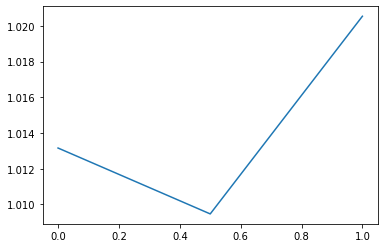

In [384]:
plt.plot(xl, sol)